In [0]:
#Connect Google Drive to Colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Drive REST API and authenticate

from google.colab import auth
auth.authenticate_user()

In [0]:
#List Files and Directories

!ls -a
!ls "/content/drive/My Drive" -a

.  ..  adc.json  .config  drive  sample_data
 3761-16440-1-PB.pdf  'Getting started.pdf'
'Colab Notebooks'      vgg16_weights_kernels.h5


In [0]:
#Change dir
import os
os.chdir('/content/drive/My Drive/Colab Notebooks')

In [0]:
import warnings
import numpy as np
import tensorflow as tf
from keras import Sequential
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
warnings.filterwarnings(action='ignore')
from keras.optimizers import SGD , RMSprop
from tensorflow.keras.layers import InputLayer
from keras.losses import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dropout,Dense,Flatten,BatchNormalization
from keras.callbacks import ModelCheckpoint,Callback,EarlyStopping
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Input,Flatten,SeparableConv2D

Using TensorFlow backend.


In [0]:
BASE_DIR='data'
TRAIN_DIR = 'data/train'
VALID_DIR = 'data/validation'
TEST_DIR = 'data/test'

In [0]:
WIDTH = 28
HEIGHT = 28
TRAIN_DATA_GEN = ImageDataGenerator(rescale=1.0/255.0,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    height_shift_range=0.1,
                                    width_shift_range=0.1,
                                    rotation_range=30)
TRAIN_DATA_ITER = TRAIN_DATA_GEN.flow_from_directory(TRAIN_DIR,
                                                     color_mode='grayscale',
                                                     target_size=(WIDTH,HEIGHT),
                                                     batch_size=32)
VALID_DATA_GEN = ImageDataGenerator(rescale=1.0/255.0)
VALID_DATA_ITER = VALID_DATA_GEN.flow_from_directory(VALID_DIR,
                                                     color_mode='grayscale',
                                                     target_size=(WIDTH,HEIGHT),
                                                     batch_size=32)
TEST_DATA_GEN = ImageDataGenerator(rescale=1.0/255.0)
TEST_DATA_ITER = TEST_DATA_GEN.flow_from_directory(TEST_DIR,
                                                     color_mode='grayscale',
                                                     target_size=(WIDTH,HEIGHT),
                                                     batch_size=32)

Found 2400 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


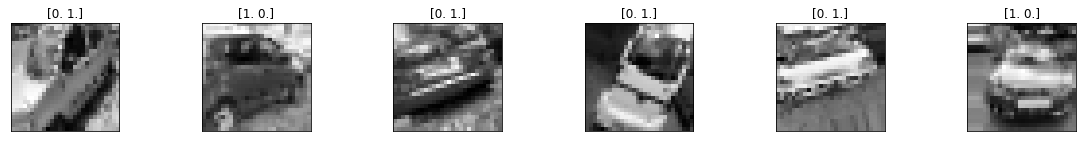

In [0]:
first_batch = TRAIN_DATA_ITER.next()
i = 0
_,ax = plt.subplots(1,6,figsize=(20,2))
for image,label in zip(first_batch[0][:6],first_batch[1][:6]):
  ax[i].imshow(image.reshape(WIDTH,HEIGHT),cmap='gray')
  ax[i].set_title(str(label))
  ax[i].set_xticks([])
  ax[i].set_yticks([])
  i+=1

In [0]:
from keras import layers
model = Sequential()
model.add(keras.layers.Conv2D(32,(1,1),input_shape=(28,28,1),activation='relu',padding='same'))
model.add(keras.layers.Conv2D(32,(1,1),input_shape=(28,28,1),activation='relu',padding='same'))
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Conv2D(64,(1,1),activation='relu'))
model.add(keras.layers.Conv2D(64,(1,1),activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Conv2D(64,(1,1),activation='relu'))
model.add(keras.layers.Conv2D(64,(1,1),activation='relu'))
model.add(keras.layers.Conv2D(64,(1,1),activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(2,activation='softmax'))
model.compile(loss=categorical_crossentropy,
              optimizer = keras.optimizers.Adam(lr=0.0003),
              metrics=['acc'])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        1056      
_________________________________________________________________
dense (Dense)                (None, 28, 28, 512)       16896     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        32832     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        4160      
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 64)        0         
________________________________________

In [0]:
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5,
                               restore_best_weights=True)#i no set checkpoin!
steps_per_epoch = TRAIN_DATA_ITER.n//TRAIN_DATA_ITER.batch_size
validation_steps = VALID_DATA_ITER.n//VALID_DATA_ITER.batch_size
history = model.fit_generator(TRAIN_DATA_ITER,
                              steps_per_epoch=steps_per_epoch,
                              epochs=20,
                              validation_data=VALID_DATA_ITER,
                              validation_steps=validation_steps,
                              shuffle=True,
                              callbacks=[early_stopping])

Epoch 1/20
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
75/75 [==============================] - 979s 13s/step - loss: 0.6938 - acc: 0.4954 - val_loss: 0.6921 - val_acc: 0.5763
Epoch 2/20
75/75 [==============================] - 56s 744ms/step - loss: 0.6906 - acc: 0.5421 - val_loss: 0.6858 - val_acc: 0.5813
Epoch 3/20
75/75 [==============================] - 55s 735ms/step - loss: 0.6898 - acc: 0.5321 - val_loss: 0.6792 - val_acc: 0.5713
Epoch 4/20
75/75 [==============================] - 56s 746ms/step - loss: 0.6898 - acc: 0.5329 - val_loss: 0.6766 - val_acc: 0.5938
Epoch 5/20
75/75 [==============================] - 56s 741ms/step - loss: 0.6858 - acc: 0.5492 - val_loss: 0.6787 - val_acc: 0.5962
Epoch 6/20
75/75 [==============================] - 55s 736ms/step - loss: 0.6857 - acc: 0.5521 - val_loss: 0.6769 - val_acc: 0.6125
Epoch 7/20
75/75 [==============================] - 55s 737ms/step - loss: 0.6859 - acc: 0.5617 - val_loss: 0

Text(0.5, 1.0, 'Accuracy')

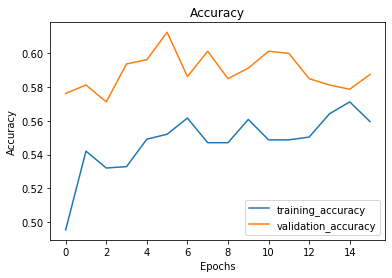

In [0]:
plt.plot(history.history['acc'],label='training_accuracy')
plt.plot(history.history['val_acc'],label='validation_accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy")

Text(0.5, 1.0, 'Loss')

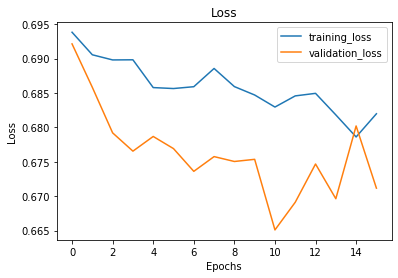

In [0]:
plt.plot(history.history['loss'],label='training_loss')
plt.plot(history.history['val_loss'],label='validation_loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss")

In [0]:
#Sequential Model with selu activation
model =Sequential()
model.add(keras.layers.Conv2D(32,(1,1),input_shape=(28,28,1),activation='selu'))
model.add(keras.layers.Conv2D(32,(1,1),input_shape=(28,28,1),activation='selu'))
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(256, activation = 'selu'))
model.add(keras.layers.Dense(2, activation = 'sigmoid'))
from keras import optimizers

model.compile(loss = 'binary_crossentropy',
              optimizer = keras.optimizers.RMSprop(lr = 2e-5),
              metrics = ['acc'])

In [0]:
history = model.fit_generator(TRAIN_DATA_ITER,
                              steps_per_epoch=steps_per_epoch,
                              epochs=20,
                              validation_data=VALID_DATA_ITER,
                              validation_steps=validation_steps,
                              shuffle=True,
                              callbacks=[early_stopping])

Epoch 1/20
75/75 [==============================] - 20s 264ms/step - loss: 0.7703 - acc: 0.4958 - val_loss: 0.7320 - val_acc: 0.5400
Epoch 2/20
75/75 [==============================] - 18s 236ms/step - loss: 0.7385 - acc: 0.5117 - val_loss: 0.7166 - val_acc: 0.5312
Epoch 3/20
75/75 [==============================] - 18s 242ms/step - loss: 0.7286 - acc: 0.5225 - val_loss: 0.7605 - val_acc: 0.5194
Epoch 4/20
75/75 [==============================] - 18s 242ms/step - loss: 0.7226 - acc: 0.5188 - val_loss: 0.6996 - val_acc: 0.5256
Epoch 5/20
75/75 [==============================] - 18s 242ms/step - loss: 0.7204 - acc: 0.5169 - val_loss: 0.7471 - val_acc: 0.5181
Epoch 6/20
75/75 [==============================] - 18s 241ms/step - loss: 0.7114 - acc: 0.5377 - val_loss: 0.6594 - val_acc: 0.6069
Epoch 7/20
75/75 [==============================] - 18s 241ms/step - loss: 0.7120 - acc: 0.5298 - val_loss: 0.6919 - val_acc: 0.5544
Epoch 8/20
75/75 [==============================] - 18s 242ms/step - 

In [0]:
model = Sequential()
model.add(keras.layers.Conv2D(32, (1,1),  activation= 'relu', input_shape = (28, 28,1)) )
model.add(keras.layers.Conv2D(64, (1,1),  activation= 'relu') )
model.add(keras.layers.Conv2D(128, (1,1),  activation= 'relu') )
model.add(keras.layers.Conv2D(128, (1,1),  activation= 'relu') )
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation= 'relu'))
model.add(keras.layers.Dense(2, activation= 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
                  optimizer = keras.optimizers.RMSprop(lr = 1e-4),
                  metrics = ['acc'])
    
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        64        
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 64)        2112      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 128)       8320      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 128)       16512     
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               51380736  
_________________________________________________________________
dense_4 (Dense)              (None, 2)                

In [0]:
history = model.fit_generator(TRAIN_DATA_ITER,
                              steps_per_epoch=steps_per_epoch,
                              epochs=10,
                              validation_data=VALID_DATA_ITER,
                              validation_steps=validation_steps,
                              shuffle=True,
                              callbacks=[early_stopping])

Epoch 1/10
75/75 [==============================] - 68s 900ms/step - loss: 0.6941 - acc: 0.5208 - val_loss: 0.6793 - val_acc: 0.5725
Epoch 2/10
75/75 [==============================] - 66s 883ms/step - loss: 0.6887 - acc: 0.5390 - val_loss: 0.6759 - val_acc: 0.5656
Epoch 3/10
75/75 [==============================] - 67s 890ms/step - loss: 0.6864 - acc: 0.5358 - val_loss: 0.6702 - val_acc: 0.5888
Epoch 4/10
75/75 [==============================] - 67s 896ms/step - loss: 0.6832 - acc: 0.5498 - val_loss: 0.6618 - val_acc: 0.6081
Epoch 5/10
75/75 [==============================] - 66s 885ms/step - loss: 0.6839 - acc: 0.5594 - val_loss: 0.6690 - val_acc: 0.5950
Epoch 6/10
75/75 [==============================] - 66s 883ms/step - loss: 0.6809 - acc: 0.5606 - val_loss: 0.6669 - val_acc: 0.6056
Epoch 7/10
75/75 [==============================] - 67s 897ms/step - loss: 0.6831 - acc: 0.5606 - val_loss: 0.6635 - val_acc: 0.5994
Epoch 8/10
75/75 [==============================] - 67s 893ms/step - 

In [0]:
#Evaluate Test Dataset
Evaluate = model.evaluate(TRAIN_DATA_ITER, verbose=0)
print('Test Score:', Evaluate[0])
print('Test Accuracy:', Evaluate[1])

Test Score: 0.6742276398340861
Test Accuracy: 0.5725


In [0]:
base_dir='data'
test_dir = os.path.join(base_dir, 'test')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation' )


test_generator = ImageDataGenerator(rescale= 1./255)
train_generator = ImageDataGenerator(rescale= 1./255)
validation_generator = ImageDataGenerator(rescale= 1./255)

train_generator = train_generator.flow_from_directory(
                                                   train_dir,              
                                                   target_size = (150,150), #Resize images to 150 X 150
                                                   batch_size  = 20,
                                                   class_mode = 'binary'
                                                   )
validation_generator = validation_generator.flow_from_directory(
                                                   validation_dir,              
                                                   target_size = (150,150), #Resize images to 150 X 150
                                                   batch_size  = 20,
                                                   class_mode = 'binary'
                                                   )

test_generator = test_generator.flow_from_directory(test_dir,              
                                                   target_size = (150,150), #Resize images to 150 X 150
                                                   batch_size  = 20,
                                                   class_mode = 'binary')

for data_batch, labels_batch, in train_generator:
    print('Data Batch shape:', data_batch.shape)
    print('Labels Batch shape:', labels_batch.shape)
    break

Found 2400 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Data Batch shape: (20, 150, 150, 3)
Labels Batch shape: (20,)


In [0]:
base_dir = 'data/'
train_swift = os.listdir(os.path.join(base_dir, 'train/swift') )
val_swift  = os.listdir(os.path.join(base_dir, 'validation/swift') )
test_swift  =  os.listdir(os.path.join(base_dir, 'test/swift') )
print('Instances for Class Swift: Train {}, Validation {} Test {}'.format(len(train_swift), len(val_swift), len(test_swift)))

Instances for Class Swift: Train 1200, Validation 400 Test 400


In [0]:
#Sanity checks: no overlaping bteween train test and validation sets
val_train = [x for x in val_swift if x in train_swift]
test_train = [x for x in test_swift if x in train_swift]
val_test =  [x for x in test_swift if x in val_swift]
len(val_train), len(test_train), len(val_test)
(0, 0, 0)

(0, 0, 0)

In [0]:
train_wr = os.listdir(os.path.join(base_dir, 'train/wagonr') )
val_wr  = os.listdir(os.path.join(base_dir, 'validation/wagonr') )
test_wr  =  os.listdir(os.path.join(base_dir, 'test/wagonr') )
print('Instances for Class Wagonr: Train {}, Validation {} Test {}'.format(len(train_swift), len(val_swift), len(test_swift)))

Instances for Class Wagonr: Train 1200, Validation 400 Test 400


In [0]:
#Sanity checks: no overlaping bteween train test and validation sets
val_train = [x for x in val_wr if x in train_wr]
test_train = [x for x in test_wr if x in train_wr]
val_test =  [x for x in test_wr if x in val_wr]
len(val_train), len(test_train), len(val_test)

(0, 0, 0)

In [0]:
model = Sequential()
model.add(keras.layers.Conv2D(32, (3,3),  activation= 'relu', input_shape = (150, 150, 3)) )
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3),  activation= 'relu') )
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(128, (3,3),  activation= 'relu') )
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(128, (3,3),  activation= 'relu') )
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation= 'relu'))
model.add(keras.layers.Dense(1, activation= 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
                  optimizer = keras.optimizers.RMSprop(lr = 1e-4),
                  metrics = ['acc']
                  )
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 15, 15, 128)      

In [0]:
early_stopping = [EarlyStopping(monitor='val_loss', patience=3 ), 
            ModelCheckpoint(filepath='cars.h5', monitor='val_loss' , save_best_only=True)]
history = model.fit_generator(train_generator,
                              steps_per_epoch= 120,  #number train_images/batch size(2400/20)
                              epochs=10,
                              validation_data=validation_generator,
                              validation_steps=40, #number valid_images/batch_size(800/20)
                              shuffle=True,
                              callbacks = early_stopping)

model.save('car.h5')

Epoch 1/10
120/120 [==============================] - 127s 1s/step - loss: 0.6673 - acc: 0.5808 - val_loss: 0.6471 - val_acc: 0.6112
Epoch 2/10
120/120 [==============================] - 127s 1s/step - loss: 0.5769 - acc: 0.7029 - val_loss: 0.5354 - val_acc: 0.7375
Epoch 3/10
120/120 [==============================] - 127s 1s/step - loss: 0.4870 - acc: 0.7671 - val_loss: 0.4812 - val_acc: 0.7738
Epoch 4/10
120/120 [==============================] - 127s 1s/step - loss: 0.4278 - acc: 0.8075 - val_loss: 0.4446 - val_acc: 0.7925
Epoch 5/10
120/120 [==============================] - 127s 1s/step - loss: 0.3817 - acc: 0.8379 - val_loss: 0.4114 - val_acc: 0.8112
Epoch 6/10
120/120 [==============================] - 127s 1s/step - loss: 0.3424 - acc: 0.8504 - val_loss: 0.3849 - val_acc: 0.8238
Epoch 7/10
120/120 [==============================] - 127s 1s/step - loss: 0.3052 - acc: 0.8721 - val_loss: 0.5076 - val_acc: 0.7725
Epoch 8/10
120/120 [==============================] - 128s 1s/step - 

Text(0.5, 1.0, 'Accuracy')

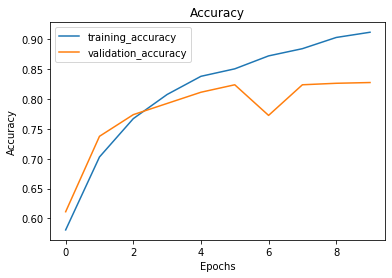

In [0]:
plt.plot(history.history['acc'],label='training_accuracy')
plt.plot(history.history['val_acc'],label='validation_accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy")

In [0]:
#save Model by Details Name
model.save('car_loss:0.219-acc:0.9117-val_loss:0.3726-val_acc:0.8275.h5')

In [0]:
from keras.models import load_model
model = tf.keras.models.load_model('car_loss:0.219-acc:0.9117-val_loss:0.3726-val_acc:0.8275.h5')
#import tensorflow as tf 
#classifierLoad = tf.keras.models.load_model('model/modeltest.h5')

In [0]:
#Evaluate Test Dataset
Evaluate = model.evaluate(test_generator, verbose=0)
print("Loss on test set: ", Evaluate[0])
print("Accuracy on test set: ", Evaluate[1])

Loss on test set:  0.38541941456496714
Accuracy on test set:  0.8325
